# 【問題1】これまで利用してきたクラスの列挙
クラスを使う際はインスタンス化を行うことと、クラスの命名法がわかりました。この情報を元に、これまでの課題で利用してきたコードの中でどのようなクラスがあったかを答えてください。


Pandas、matplotlib、scikit-learnからそれぞれ1つ以上見つけてください。

In [33]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:10]
scaler = StandardScaler()
scaler.fit(X)
print("平均 :", scaler.mean_)
print("分散 :", scaler.var_)
X_std = scaler.transform(X)
X_std

平均 : [4.86 3.31 1.45 0.22]
分散 : [0.0764 0.0849 0.0105 0.0056]


array([[ 0.86828953,  0.65207831, -0.48795004, -0.26726124],
       [ 0.14471492, -1.06391725, -0.48795004, -0.26726124],
       [-0.57885968, -0.37751902, -1.46385011, -0.26726124],
       [-0.94064699, -0.72071813,  0.48795004, -0.26726124],
       [ 0.50650222,  0.99527742, -0.48795004, -0.26726124],
       [ 1.95365143,  2.02487476,  2.43975018,  2.40535118],
       [-0.94064699,  0.3088792 , -0.48795004,  1.06904497],
       [ 0.50650222,  0.3088792 ,  0.48795004, -0.26726124],
       [-1.66422159, -1.40711636, -0.48795004, -0.26726124],
       [ 0.14471492, -0.72071813,  0.48795004, -1.60356745]])

/Users/yuki.tatsuoka/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/yuki.tatsuoka/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


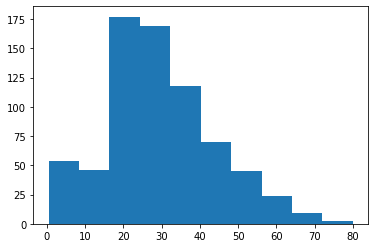

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

#pandas
df = pd.read_csv("/Users/yuki.tatsuoka/Downloads/titanic_v1.1/train.csv")

#matplotlib
plt.hist(df["Age"])
plt.show()

#scikit-learn
scaler = sklearn.linear_model.LinearRegression()

# 【問題2】これまで利用してきたメソッドやインスタンス変数の列挙
これまでの課題で利用してきたコードの中でどのようなメソッドやインスタンス変数があったかを答えてください。


最低でもそれぞれ5つ以上答えてください。


《ndarrayやstrもインスタンス》


ドットをつけるというと、NumPyのndarrayに対してndarray.shapeやndarray.sum()のような使い方は何度も利用してきたかと思います。これは、ndarrayもインスタンスオブジェクトであり、shapeはインスタンス変数、sumはメソッドだったということです。


Pythonのコードに登場するデータはどれもインスタンスオブジェクトであり、listやstrもメソッドを持ちます。

### 考察
◾️メソッド<br>
list.append()<br>
plt.scatter()<br>
pd.read_csv()<br>

◾️インスタンス変数<br>
np.shape<br>
GridSerchCV.get_params_<br>
GridSerchCV.best_score_<br>


# 【問題3】標準化クラスをスクラッチで作成
理解をより深めるため、StandardScalerをスクラッチで作成しましょう。scikit-learnは使わず、NumPyなどを活用して標準化の計算を記述します。具体的にはfitメソッドとtransformメソッドを作ります。


今回は雛形を用意しました。クラスの作成方法は関数に近いです。メソッドはクラスの中にさらにインデントを一段下げて記述します。


インスタンス変数を作成する際はself.mean_のようにselfを付けます。クラスの外からscaler.mean_と書いていたscalerの部分が自分自身を表すselfになっています。

In [40]:
class ScratchStandardScaler():
    """
    mean_ : 次の形のndarray, shape(n_features,)
        平均
    var_ : 次の形のndarray, shape(n_features,)
        分散
    """
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.var_ = np.var(X, axis=0)
    def transform(self, X):
        """
        X : 次の形のndarray, shape (n_samples, n_features)
            特徴量
        Returns
        ----------
        X_scaled : 次の形のndarray, shape (n_samples, n_features)
            標準化された特緒量
        """
        X_scaled = (X-self.mean_)/(self.var_)
        return X_scaled

In [41]:
import numpy as np
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:10]
scratch_scaler = ScratchStandardScaler()
scratch_scaler.fit(X)
print("平均 : {}".format(scratch_scaler.mean_))
print("分散 : {}".format(scratch_scaler.var_))
X_std = scratch_scaler.transform(X)
print(X_std)

平均 : [4.86 3.31 1.45 0.22]
分散 : [0.0764 0.0849 0.0105 0.0056]
[[  3.14136126   2.23792697  -4.76190476  -3.57142857]
 [  0.52356021  -3.65135453  -4.76190476  -3.57142857]
 [ -2.09424084  -1.29564193 -14.28571429  -3.57142857]
 [ -3.40314136  -2.47349823   4.76190476  -3.57142857]
 [  1.83246073   3.41578327  -4.76190476  -3.57142857]
 [  7.06806283   6.94935218  23.80952381  32.14285714]
 [ -3.40314136   1.06007067  -4.76190476  14.28571429]
 [  1.83246073   1.06007067   4.76190476  -3.57142857]
 [ -6.02094241  -4.82921084  -4.76190476  -3.57142857]
 [  0.52356021  -2.47349823   4.76190476 -21.42857143]]


# 【問題4】 四則演算を行うクラスの作成
上記ExampleClassは足し算のメソッドを持っていますが、これに引き算、掛け算、割り算のメソッドを加えてください。


コンストラクタに入力されたvalueが文字列や配列など数値以外だった場合にはエラーを出すようにしてください。


クラス名や説明文も適切に書き換えてください。

In [48]:
class ExampleClass():
    """
    説明用の簡単なクラス
    Parameters
    ----------
    value : float or int
        初期値
    Attributes
    ----------
    value : float or int
        計算結果
    """
    def __init__(self, value):
        self.value = value
        if self.value != object:
            print("初期値{}が設定されました".format(self.value))
        else:
            raise TypeError("object型が入っています")
            
    def add(self, value2):
        """
        受け取った引数をself.valueに加える
        """
        self.value += value2
        
    def minus(self, value3):
        """
        受け取った引数をself.valueから引く
        """
        self.value -= value3
    
    def times(self, value4):
        """
        受け取った引数をself.valueにかける
        """
        self.value*= value4
    
    def divede(self, value5):
        """
        受け取った引数をself.valueにかける
        """
        self.value /= value5
        
example = ExampleClass(5)
print("value : {}".format(example.value))
example.add(3)
print("value : {}".format(example.value))
example.minus(2)
print("value : {}".format(example.value))
example.times(10)
print("value : {}".format(example.value))
example.divede(5)
print("value : {}".format(example.value))

初期値5が設定されました
value : 5
value : 8
value : 6
value : 60
value : 12.0
